In [2]:
# Import required libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### A larger example

In [3]:
# Read in the insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
# Let's try one-hot encode categorical data
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [9]:
# Create X and y values (features and labels)

X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [13]:
# Create training and tests sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [15]:
# Build a neural network (sort of like model_2 above)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(11,)),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8746.6045 - mae: 8746.6045
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7602.3638 - mae: 7602.3638
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7810.7188 - mae: 7810.7188
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7483.9883 - mae: 7483.9883
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7751.5737 - mae: 7751.5737
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7829.2666 - mae: 7829.2666
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7641.9697 - mae: 7641.9697
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7677.5708 - mae: 7677.5708
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7734.6157 - mae: 7734.6157
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7560.4453 - mae: 7560.4453

In [16]:
# Check the results of the insurance model  on the test data
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 869us/step - loss: 5819.2485 - mae: 5819.2485


[5819.24853515625, 5819.24853515625]

In [18]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well... let's try and improve it!

To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units
2. Train for longer
3. Use different optimizer

In [21]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(11,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics='mae')

# 3. Fit the  model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose =0)

In [22]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 829us/step - loss: 4817.8696 - mae: 4817.8696


[4817.86962890625, 4817.86962890625]

In [23]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 5819.2485 - mae: 5819.2485


[5819.24853515625, 5819.24853515625]

In [24]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(11,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 13303.9365 - mae: 13303.9365
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 13186.9404 - mae: 13186.9404
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 12917.8486 - mae: 12917.8486
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 12351.7266 - mae: 12351.7266
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 11346.0498 - mae: 11346.0498
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 9945.2031 - mae: 9945.2031
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 8524.9854 - mae: 8524.9854
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 7665.4976 - mae: 7665.4976
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 7470.3452 - mae: 7470.3452
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 7444.0557 - mae:

In [25]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3504.4541 - mae: 3504.4541


[3504.4541015625, 3504.4541015625]

In [26]:
insurance_model_2.evaluate(X_test, y_test), model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 5819.2485 - mae: 5819.2485


([4817.86962890625, 4817.86962890625], [5819.24853515625, 5819.24853515625])

Text(0.5, 0, 'epochs')

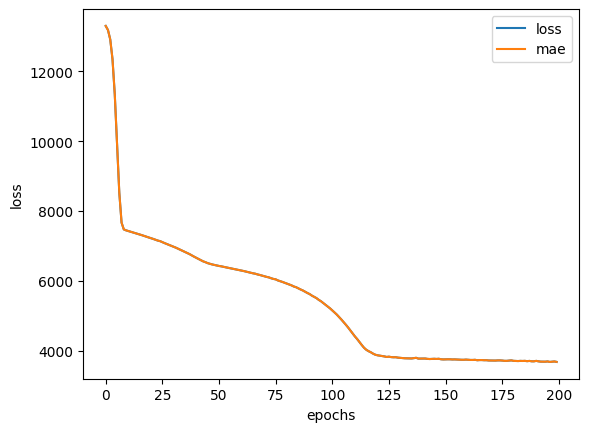

In [27]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

### Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.


In [28]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


<AxesSubplot:ylabel='Frequency'>

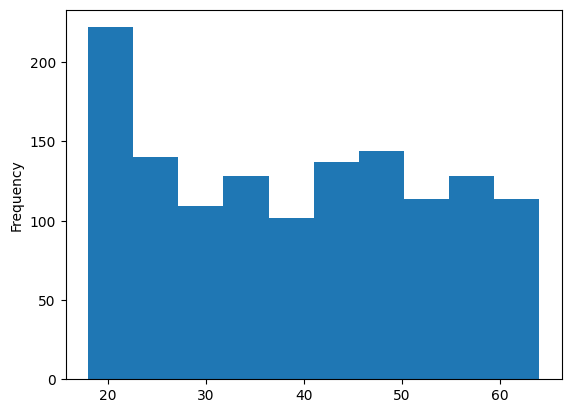

In [29]:
X['age'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

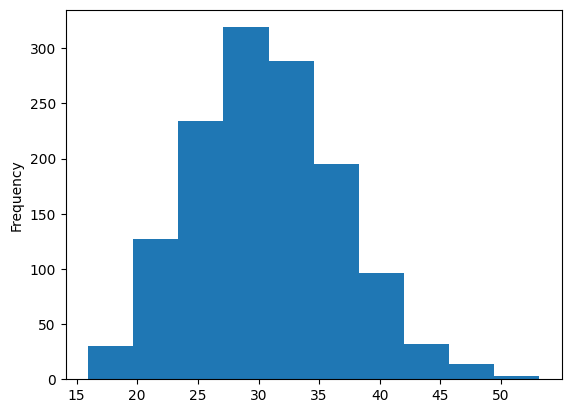

In [30]:
X['bmi'].plot(kind='hist')

In [31]:
X['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64